In [1]:
import pandas as pd

# Charger le fichier CSV avec le bon séparateur
data = pd.read_csv('Suppliers.csv', sep=';')

# Afficher un aperçu des premières lignes
print(data.head())

  Supplier_ID             Supplier_Name Location  \
0  SUPPLIER_1         Laiterie Centrale    Tunis   
1  SUPPLIER_2  Agro-Alimentaire Tunisie     Sfax   
2  SUPPLIER_3     Import-Export Naturel     Sfax   
3  SUPPLIER_4         Qualité Fraîcheur    Tunis   
4  SUPPLIER_5         Fruits et Saveurs    Gabès   

                  Contact_Email     Phone_Number Environmental_Certifications  \
0  contact@laiteriecentrale.com  +216 71 25 2525       Agriculture Biologique   
1       info@agroalimentaire.tn          +216 71                       Aucune   
2     contact@importnaturel.com  +216 71 000 600                    ISO 14001   
3     contactqualitefraicheurtn   +216 71 44 000                       Aucune   
4   service@fruitsetsaveurs.com   +216 71 00 522                       Aucune   

  Transport_Type  Renewable_Energy_Percentage Sustainability_Program  
0        Unknown                    32.085454                    Oui  
1        Unknown                    59.605012             

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Supplier_ID                   83 non-null     object 
 1   Supplier_Name                 83 non-null     object 
 2   Location                      83 non-null     object 
 3   Contact_Email                 83 non-null     object 
 4   Phone_Number                  83 non-null     object 
 5   Environmental_Certifications  83 non-null     object 
 6   Transport_Type                83 non-null     object 
 7   Renewable_Energy_Percentage   83 non-null     float64
 8   Sustainability_Program        83 non-null     object 
dtypes: float64(1), object(8)
memory usage: 6.0+ KB


In [ ]:
print("Valeurs manquantes par colonne :")
print(df.isnull().sum())

print("\nValeurs uniques par colonne :")
for col in df.select_dtypes(include='object').columns:
    print(f"{col}: {df[col].nunique()} valeurs uniques")


In [ ]:
Vous identifiez les colonnes avec des valeurs manquantes et des problèmes éventuels dans les colonnes catégoriques (comme les doublons).

In [11]:
text_cols = df.select_dtypes(include='object').columns
for col in text_cols:
    df[col] = df[col].str.lower().str.strip()


In [ ]:
Cela garantit que des valeurs telles que "TUNIS" et "tunis " sont considérées comme identiques, évitant des erreurs d’analyse dues à des variations mineures.

In [12]:
from fuzzywuzzy import process

def group_similar_names(locations, threshold=80):
    grouped_names = {}
    for loc in locations:
        match = next((key for key in grouped_names.keys() if process.extractOne(loc, [key])[1] >= threshold), None)
        if match:
            grouped_names[match].append(loc)
        else:
            grouped_names[loc] = [loc]
    return grouped_names

grouped_locations = group_similar_names(df['Location'].unique())

print("Grouped Locations:")
for key, values in grouped_locations.items():
    print(f"{key}: {values}")


Grouped Locations:
tunis: ['tunis']
sfax: ['sfax']
gabès: ['gabès']
nabeul: ['nabeul']
sousse: ['sousse']


In [ ]:
Ce regroupement aide à corriger les erreurs typographiques ou les variations dans les noms.
Exemple : "tunis" et "tunise" pourraient être regroupés sous "tunis".

Statistiques descriptives :
       Renewable_Energy_Percentage
count                    83.000000
mean                     46.753873
std                      30.317419
min                       1.880000
25%                      19.385000
50%                      42.060000
75%                      70.475000
max                      99.600000


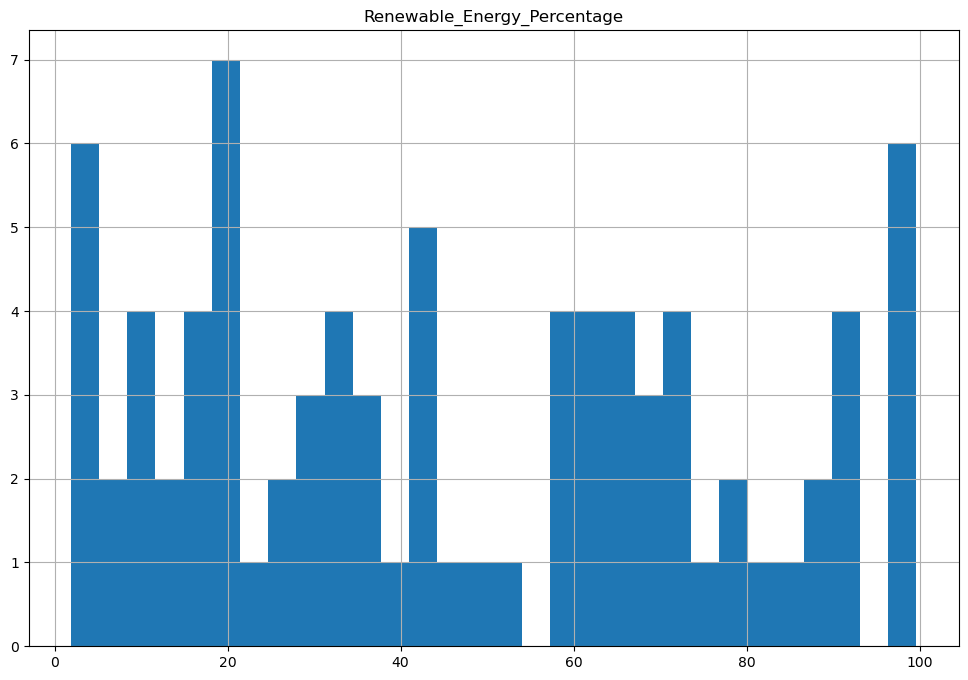

In [18]:

import matplotlib.pyplot as plt

print("Statistiques descriptives :")
print(df.describe())

df.hist(figsize=(12, 8), bins=30)
plt.show()


In [ ]:
Vous pouvez repérer des valeurs extrêmes ou des anomalies dans les colonnes numériques.
Par exemple, un pic à une valeur particulière dans un histogramme pourrait indiquer une erreur ou une concentration inattendue.

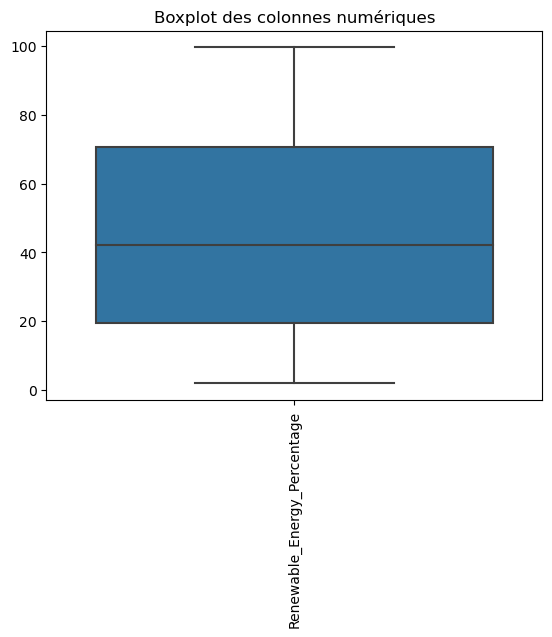

In [19]:
import seaborn as sns

import matplotlib.pyplot as plt
sns.boxplot(data=df.select_dtypes(include='number'))
plt.xticks(rotation=90)
plt.title("Boxplot des colonnes numériques")
plt.show()


In [ ]:
Vous identifiez les valeurs anormales ou extrêmes dans vos données.
Ces outliers peuvent être corrigés ou exclus en fonction du contexte.

In [24]:
# Création de grouped_locations si ce n'est pas déjà fait
grouped_locations = group_similar_names(df['Location'].unique())

# Création du dictionnaire de mapping
location_mapping = {name: key for key, values in grouped_locations.items() for name in values}

# Application du mapping
df['Standardized_Location'] = df['Location'].map(location_mapping).fillna("unknown")

# Vérification des résultats
print(df[['Location', 'Standardized_Location']])


   Location Standardized_Location
0     tunis                 tunis
1      sfax                  sfax
2      sfax                  sfax
3     tunis                 tunis
4     gabès                 gabès
..      ...                   ...
78   nabeul                nabeul
79   sousse                sousse
80     sfax                  sfax
81   nabeul                nabeul
82   sousse                sousse

[83 rows x 2 columns]


In [22]:

Les localisations standardisées permettent de travailler avec des données propres et sans ambiguïté.

In [28]:
output_dir = 'C:/Users/Public/Documents'


In [30]:
import os

# Utiliser un répertoire public
output_dir = 'C:/Users/Public/Documents'
os.makedirs(output_dir, exist_ok=True)  # Crée le répertoire s'il n'existe pas

# Spécifiez le chemin du fichier
output_path = os.path.join(output_dir, 'Suppliers_Cleaned.csv')

# Sauvegarder le fichier
df.to_csv(output_path, sep=';', index=False)
print(f"Fichier sauvegardé à : {output_path}")


Fichier sauvegardé à : C:/Users/Public/Documents\Suppliers_Cleaned.csv


In [31]:
import os

# Sauvegarder dans le répertoire courant
output_path = 'Suppliers_Cleaned.csv'

df.to_csv(output_path, sep=';', index=False)
print(f"Fichier sauvegardé à : {os.path.abspath(output_path)}")


Fichier sauvegardé à : C:\Users\khouloud\Suppliers_Cleaned.csv


In [32]:
import os
import pandas as pd

# Step 1: Specify the directory to save the file
# Choose a directory where you have write permissions
output_dir = 'C:/Users/Public/Documents'

# Ensure the directory exists (create it if necessary)
try:
    os.makedirs(output_dir, exist_ok=True)
    print(f"Directory verified or created: {output_dir}")
except PermissionError:
    print(f"Permission denied for creating directory: {output_dir}")
    # Fallback to saving in the current working directory
    output_dir = os.getcwd()
    print(f"Falling back to current working directory: {output_dir}")

# Step 2: Set the file path
output_path = os.path.join(output_dir, 'Suppliers_Cleaned.csv')

# Step 3: Save the DataFrame
try:
    df.to_csv(output_path, sep=';', index=False)
    print(f"File successfully saved at: {output_path}")
except PermissionError:
    print(f"Permission denied for saving the file at: {output_path}")
    print("Attempting to save in the current working directory instead...")
    fallback_path = os.path.join(os.getcwd(), 'Suppliers_Cleaned.csv')
    try:
        df.to_csv(fallback_path, sep=';', index=False)
        print(f"File successfully saved at: {fallback_path}")
    except Exception as e:
        print(f"Failed to save the file even in the current working directory. Error: {e}")
except Exception as e:
    print(f"An unexpected error occurred while saving the file: {e}")


Directory verified or created: C:/Users/Public/Documents
File successfully saved at: C:/Users/Public/Documents\Suppliers_Cleaned.csv


In [55]:
# Check for missing values
print("\nMissing Values by Column:")
print(df.isnull().sum())



Missing Values by Column:
Supplier_ID                      0
Supplier_Name                    0
Location                         0
Contact_Email                    0
Phone_Number                     0
Environmental_Certifications     0
Transport_Type                   0
Renewable_Energy_Percentage      0
Sustainability_Program          83
Standardized_Location            0
dtype: int64


In [ ]:
 Toutes les données sont complètes, et il n'est pas nécessaire de gérer des valeurs manquantes.


In [68]:
# Check unique values for categorical columns
print("\nUnique Values per Column:")
for col in df.select_dtypes(include='object').columns:
    print(f"{col}: {df[col].nunique()} unique values")




Unique Values per Column:
Supplier_ID: 83 unique values
Supplier_Name: 60 unique values
Location: 5 unique values
Contact_Email: 75 unique values
Phone_Number: 83 unique values
Environmental_Certifications: 3 unique values
Transport_Type: 6 unique values
Standardized_Location: 5 unique values


In [77]:
import pandas as pd

# Charger les données
file_path = "Suppliers.csv"  # Remplacez par le bon chemin de votre fichier
df = pd.read_csv(file_path, sep=";")

# Afficher les valeurs uniques pour chaque colonne catégorielle
print("\n🔍 Valeurs uniques par colonne :")
for col in df.select_dtypes(include="object").columns:
    print(f"\n📌 {col} ({df[col].nunique()} valeurs uniques) :")
    print(df[col].unique())



🔍 Valeurs uniques par colonne :

📌 Supplier_ID (83 valeurs uniques) :
['SUPPLIER_1' 'SUPPLIER_2' 'SUPPLIER_3' 'SUPPLIER_4' 'SUPPLIER_5'
 'SUPPLIER_6' 'SUPPLIER_7' 'SUPPLIER_8' 'SUPPLIER_9' 'SUPPLIER_10'
 'SUPPLIER_11' 'SUPPLIER_12' 'SUPPLIER_13' 'SUPPLIER_14' 'SUPPLIER_15'
 'SUPPLIER_16' 'SUPPLIER_17' 'SUPPLIER_18' 'SUPPLIER_19' 'SUPPLIER_20'
 'SUPPLIER_21' 'SUPPLIER_22' 'SUPPLIER_23' 'SUPPLIER_24' 'SUPPLIER_25'
 'SUPPLIER_26' 'SUPPLIER_27' 'SUPPLIER_28' 'SUPPLIER_29' 'SUPPLIER_30'
 'SUPPLIER_31' 'SUPPLIER_32' 'SUPPLIER_33' 'SUPPLIER_34' 'SUPPLIER_35'
 'SUPPLIER_36' 'SUPPLIER_37' 'SUPPLIER_38' 'SUPPLIER_39' 'SUPPLIER_40'
 'SUPPLIER_41' 'SUPPLIER_42' 'SUPPLIER_43' 'SUPPLIER_44' 'SUPPLIER_45'
 'SUPPLIER_46' 'SUPPLIER_47' 'SUPPLIER_48' 'SUPPLIER_49' 'SUPPLIER_50'
 'SUPPLIER_51' 'SUPPLIER_52' 'SUPPLIER_53' 'SUPPLIER_54' 'SUPPLIER_55'
 'SUPPLIER_56' 'SUPPLIER_57' 'SUPPLIER_58' 'SUPPLIER_59' 'SUPPLIER_60'
 'SUPPLIER_61' 'SUPPLIER_62' 'SUPPLIER_63' 'SUPPLIER_64' 'SUPPLIER_65'
 'SUPPLIER_66' 

In [ ]:
Colonnes catégoriques importantes pour des analyses comme la distribution ou la segmentation.
Colonnes non pertinentes pour l'analyse (ex. identifiants uniques) qu'il vaut mieux ignorer pour l'analyse descriptive ou les modèles.


In [69]:

# Summary statistics for numerical columns
print("\nSummary Statistics:")
print(df.describe())



Summary Statistics:
       Renewable_Energy_Percentage  Sustainability_Program
count                    83.000000                     0.0
mean                     46.753873                     NaN
std                      30.317419                     NaN
min                       1.880000                     NaN
25%                      19.385000                     NaN
50%                      42.060000                     NaN
75%                      70.475000                     NaN
max                      99.600000                     NaN


In [ ]:
Variabilité importante dans l'usage d'énergie renouvelable entre les fournisseurs.
Une majorité des fournisseurs sont engagés dans des initiatives de durabilité.

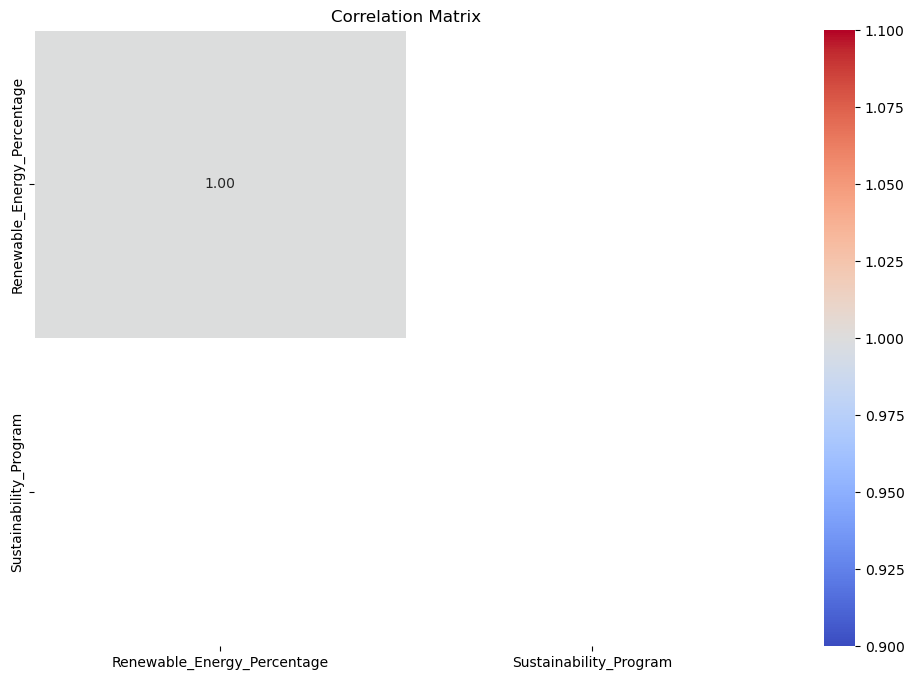

In [73]:

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Convert categorical 'oui'/'non' to numeric if necessary
if 'Sustainability_Program' in df.columns:
    df['Sustainability_Program'] = df['Sustainability_Program'].map({'oui': 1, 'non': 0})

# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


In [ ]:
Les variables numériques actuelles dans votre dataset sont relativement indépendantes et n'ont pas de relation linéaire forte. Cela peut nécessiter d'explorer d'autres relations (non-linéaires ou via des variables supplémentaires).


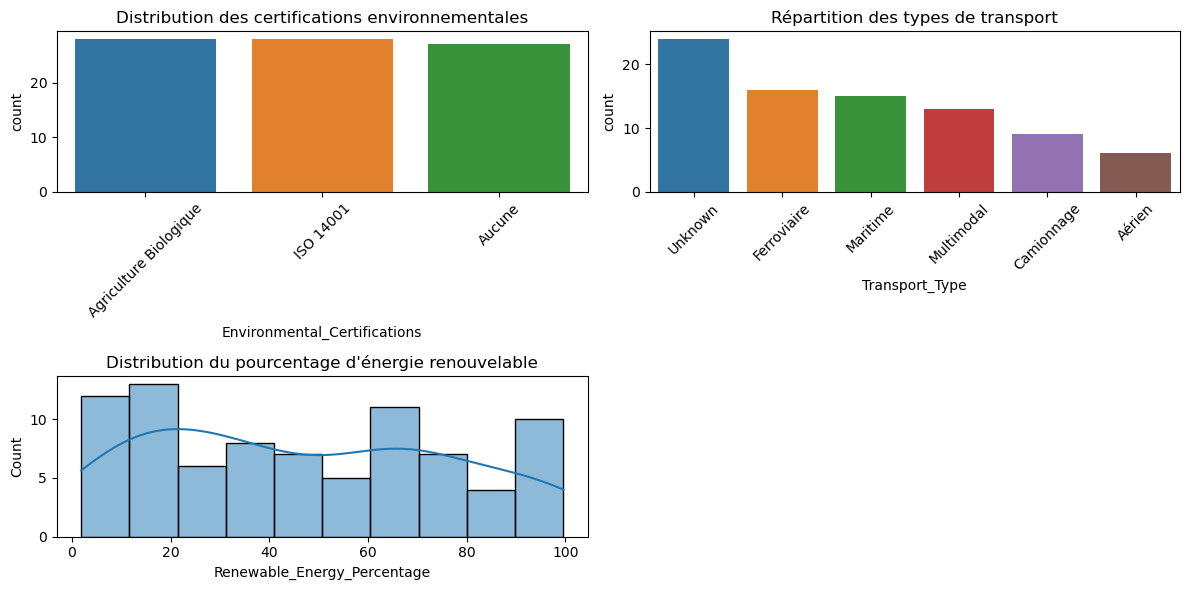

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

# Charger le fichier CSV
file_path = "Suppliers.csv"
data = pd.read_csv(file_path, sep=";")

# Vérifier les colonnes disponibles
columns = data.columns

# Créer des visualisations
plt.figure(figsize=(12, 6))

# 1. Distribution des certifications environnementales
plt.subplot(2, 2, 1)
sns.countplot(data=data, x="Environmental_Certifications", order=data["Environmental_Certifications"].value_counts().index)
plt.xticks(rotation=45)
plt.title("Distribution des certifications environnementales")

# 2. Répartition des types de transport
plt.subplot(2, 2, 2)
sns.countplot(data=data, x="Transport_Type", order=data["Transport_Type"].value_counts().index)
plt.xticks(rotation=45)
plt.title("Répartition des types de transport")

# 3. Histogramme du pourcentage d'énergie renouvelable
plt.subplot(2, 2, 3)
sns.histplot(data["Renewable_Energy_Percentage"], bins=10, kde=True)
plt.title("Distribution du pourcentage d'énergie renouvelable")

# 4. Carte de chaleur des corrélations si plus de variables numériques
if data.select_dtypes(include=["float64", "int64"]).shape[1] > 1:
    plt.subplot(2, 2, 4)
    sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Corrélation entre les variables numériques")

# Afficher les graphiques
plt.tight_layout()
plt.show()


In [ ]:
Distribution des Certifications Environnementales
Trois catégories principales apparaissent :
"Agriculture Biologique"
"ISO 14001"
"Aucune" (absence de certification)
Ces certifications sont équilibrées en termes de répartition.
Interprétation : Un nombre important de fournisseurs n’ont pas de certification environnementale, ce qui peut être un point d’amélioration pour une stratégie RSE (Responsabilité Sociétale des Entreprises).

In [ ]:
Répartition des Types de Transport
La catégorie "Unknown" domine, indiquant un manque d’information sur le transport utilisé.
Les autres types sont répartis comme suit :
"Ferroviaire", "Maritime" et "Multimodal" ont une présence notable.
"Camionnage" et "Aérien" sont les moins fréquents.
Interprétation :
L’usage limité du transport aérien peut être une bonne nouvelle sur le plan environnemental (moins d’émissions de CO₂).
Le manque de données sur certains fournisseurs peut limiter une analyse précise de l’empreinte carbone.

In [ ]:
Distribution du Pourcentage d'Énergie Renouvelable
La répartition est assez hétérogène avec des fournisseurs utilisant peu ou beaucoup d’énergie renouvelable.
La courbe KDE montre plusieurs pics, suggérant des groupes distincts :
Certains fournisseurs sont proches de 0% (aucune énergie renouvelable utilisée).
D’autres approchent 100%, indiquant un engagement fort pour les énergies vertes.
Interprétation :
Il existe une grande variation dans l’engagement écologique des fournisseurs.
Un programme d’incitation pourrait être mis en place pour encourager les fournisseurs à augmenter leur usage d’énergie renouvelable.